# Aim
- **Objective:** Use a Support Vector Machine to classify text data—a non-vectorial dataset—by converting the raw text into numerical features with TF-IDF.
- **Workflow:** Load the 20 Newsgroups dataset, transform text into TF-IDF features, split the data, train an SVM classifier, and evaluate its performance.

# Algorithm
1. **Data Loading:**  
   - Fetch the 20 Newsgroups dataset containing text documents from 20 different topics.
2. **Feature Extraction:**  
   - Convert raw text into numerical vectors using `TfidfVectorizer`, which captures word importance across documents.
3. **Data Splitting:**  
   - Split the vectorized data into training and testing sets.
4. **Model Training:**  
   - Train an SVC (using a linear kernel, suitable for high-dimensional sparse data) on the training data.
5. **Evaluation:**  
   - Make predictions on the test set and calculate accuracy, generate a classification report, and compute a confusion matrix.
6. **Visualization:**  
   - Visualize the confusion matrix with a heatmap for a clear view of the classifier's performance.

# Algorithm Description
- **Handling Non-Vectorial Data:**  
  Since text data is inherently non-numeric, TF-IDF is applied to convert documents into numerical vectors that emphasize informative words.
- **Support Vector Machine (SVM):**  
  The SVM finds the optimal linear decision boundary (hyperplane) to separate the classes in the transformed feature space.
- **Performance Evaluation:**  
  The model is assessed using accuracy and detailed classification metrics to understand its performance across different topics, with a confusion matrix providing insights into specific misclassifications.

## Results for SVM on 20 Newsgroups

- **Overall Accuracy:** 67.55%

- **Macro Average Metrics:**
  - Precision: 0.68
  - Recall: 0.66
  - F1-Score: 0.67

- **Weighted Average Metrics:**
  - Precision: 0.69
  - Recall: 0.68
  - F1-Score: 0.68

### Observations
- **Per-Class Variability:**  
  Some classes show higher performance (e.g., classes 5, 10, and 11) while others (e.g., classes 0, 8, and 19) perform relatively lower.
- **Balanced Performance:**  
  The overall metrics indicate a moderate yet balanced performance across the 20 topics, reflecting the challenges of classifying diverse text data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test  = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))
X_train, y_train = newsgroups_train.data, newsgroups_train.target
X_test, y_test   = newsgroups_test.data, newsgroups_test.target

In [3]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.5)),
    ('svc', SVC(kernel='linear'))
])

In [4]:
param_grid = {
    'tfidf__max_df': [0.75],
    'tfidf__ngram_range': [(1,1)],
    'svc__C': [1]
}

In [5]:
grid_search = GridSearchCV(pipeline, param_grid, cv=2, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(max_df=0.5,
                                                        stop_words='english')),
                                       ('svc', SVC(kernel='linear'))]),
             n_jobs=-1,
             param_grid={'svc__C': [1], 'tfidf__max_df': [0.75],
                         'tfidf__ngram_range': [(1, 1)]},
             verbose=1)

In [6]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'svc__C': 1, 'tfidf__max_df': 0.75, 'tfidf__ngram_range': (1, 1)}


In [7]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [8]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.4f}".format(acc))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6755

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.48      0.47       319
           1       0.61      0.72      0.66       389
           2       0.65      0.61      0.63       394
           3       0.65      0.67      0.66       392
           4       0.75      0.66      0.71       385
           5       0.86      0.66      0.75       395
           6       0.77      0.79      0.78       390
           7       0.64      0.72      0.68       396
           8       0.45      0.79      0.58       398
           9       0.81      0.77      0.79       397
          10       0.92      0.82      0.87       399
          11       0.90      0.68      0.78       396
          12       0.55      0.61      0.58       393
          13       0.77      0.75      0.76       396
          14       0.71      0.73      0.72       394
          15       0.68      0.74      0.71       398
          16       0.61      0.64      0

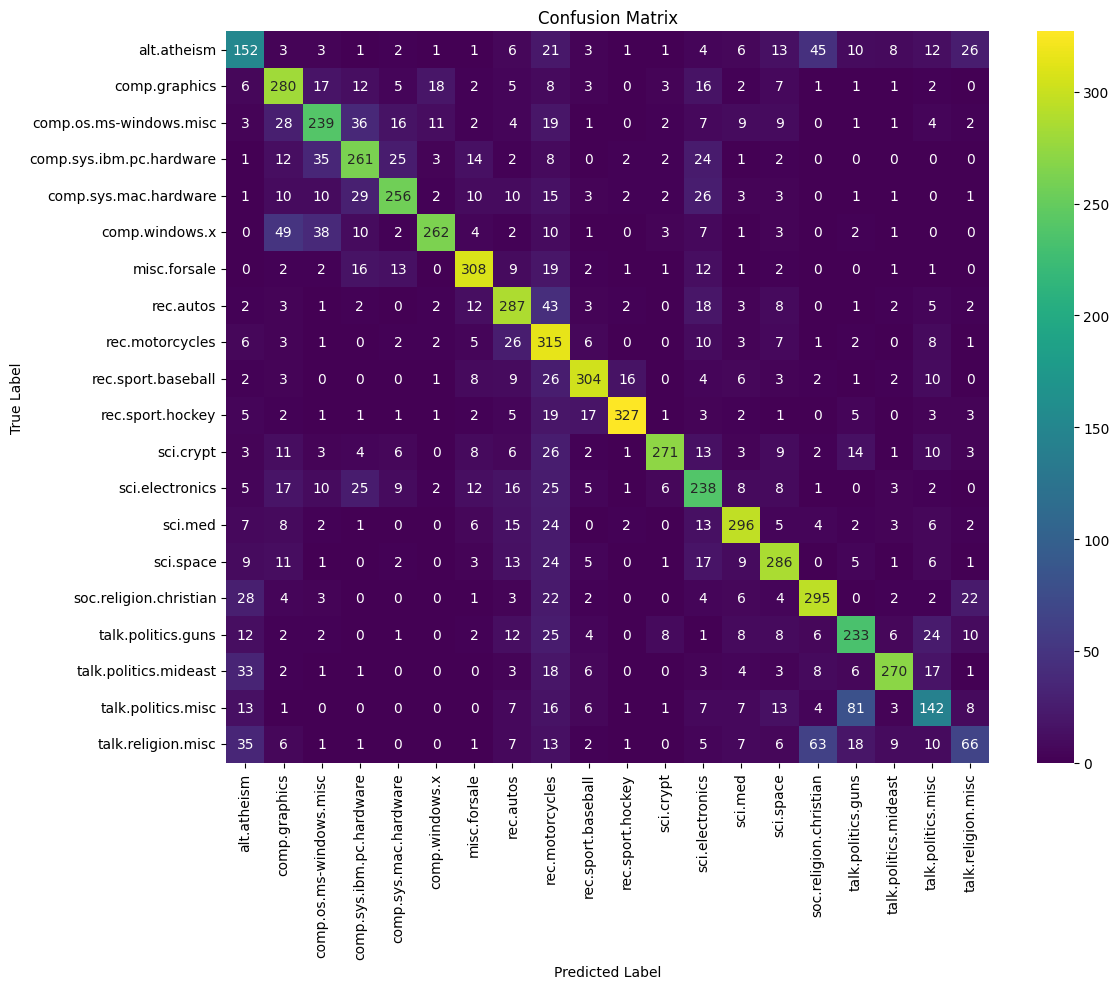

In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis",
            xticklabels=newsgroups_train.target_names,
            yticklabels=newsgroups_train.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()